##### Kaggle Project
## Zillow Prize: Zillow’s Home Value Prediction (Zestimate)Zillow
Can you improve the algorithm that changed the world of real estate?
- (project introduce)
- y: logerror

##### Importing the necessary libraries

In [ ]:
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk

import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
# import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

In [1]:
%matplotlib inline   

# ignore warning messeges
import warnings
warnings.filterwarnings('ignore')

# excel file
import xlrd
import openpyxl

## Importing Data

#### 1) Data Dictionary

In [2]:
data_dict = pd.read_excel('data/zillow_data_dictionary.xlsx', 'Data Dictionary')
data_dict.tail()

,Feature,Description,비고,Unnamed: 3
53,'landtaxvaluedollarcnt',The assessed value of the land area of the parcel,NaN,NaN
54,'taxamount',The total property tax assessed for that asses...,NaN,NaN
55,'assessmentyear',The year of the property tax assessment,NaN,NaN
56,'taxdelinquencyflag',Property taxes for this parcel are past due as...,NaN,NaN
57,'taxdelinquencyyear',Year for which the unpaid propert taxes were due,NaN,NaN


#### 2) Train data

In [3]:
train16 = pd.read_csv('data/train_2016_v2.csv', parse_dates=["transactiondate"])
train16.tail()

,parcelid,logerror,transactiondate
90270,10774160,-0.0356,2016-12-30
90271,12046695,0.0070,2016-12-30
90272,12995401,-0.2679,2016-12-30
90273,11402105,0.0602,2016-12-30
90274,12566293,0.4207,2016-12-30


In [4]:
train17 = pd.read_csv('data/train_2017.csv', parse_dates=["transactiondate"])
train17.tail()

,parcelid,logerror,transactiondate
77608,10833991,-0.002245,2017-09-20
77609,11000655,0.020615,2017-09-20
77610,17239384,0.013209,2017-09-21
77611,12773139,0.037129,2017-09-21
77612,12826780,0.007204,2017-09-25


In [5]:
print("shape of train16: ",train16.shape)
print("shape of train17: ",train17.shape)

shape of train16:  (90275, 3)
shape of train17:  (77613, 3)


#### 3) Properties Data

In [6]:
prop16 = pd.read_csv('data/properties_2016.csv')
prop16.tail()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
2985212,168176230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985213,14273630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985214,168040630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985215,168040830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985216,168040430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
prop17 = pd.read_csv('data/properties_2017.csv')
prop17.tail()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
2985212,12170430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985213,11422430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985214,17203030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985215,14242830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985216,12766630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
print("shape of prop16: ", prop16.shape)
print("shape of prop17: ", prop17.shape)

shape of prop16:  (2985217, 58)
shape of prop17:  (2985217, 58)


##### prop16과 prop17의 parcelid 비교
- 두 데이터는 서로 동일한 집에 대한 데이터들을 담고 있음

In [9]:
# prop16과 prop17의 parcelid를 합쳤을 때 개수를 확인
id16 = prop16["parcelid"].rename(columns={"parcelid":"2016"})
id17 = prop16["parcelid"].rename(columns={"parcelid":"2017"})
id = pd.concat([id16, id17], axis=1, join='inner') 
print("shape of id: ", id.shape)
id[0][id[0]!=id[1]]    # 2016과 2017이 다를 때로 filtering

shape of id:  (2985217, 2)


Series([], Name: 0, dtype: int64)

#### train & properties merge

In [10]:
# traing16을 기준으로 prop16을 merge
merged16 = pd.merge(train16, prop16, on="parcelid", how="left")
merged16.tail()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
90270,10774160,-0.0356,2016-12-30,1.0,NaN,NaN,1.0,1.0,NaN,4.0,...,NaN,NaN,43800.0,191000.0,2015.0,147200.0,2495.24,NaN,NaN,6.037132e+13
90271,12046695,0.0070,2016-12-30,NaN,NaN,NaN,3.0,3.0,NaN,4.0,...,NaN,NaN,117893.0,161111.0,2015.0,43218.0,1886.54,NaN,NaN,6.037301e+13
90272,12995401,-0.2679,2016-12-30,NaN,NaN,NaN,2.0,4.0,NaN,7.0,...,NaN,NaN,22008.0,38096.0,2015.0,16088.0,1925.70,Y,14.0,6.037433e+13
90273,11402105,0.0602,2016-12-30,NaN,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,132991.0,165869.0,2015.0,32878.0,2285.57,NaN,NaN,6.037601e+13
90274,12566293,0.4207,2016-12-30,NaN,NaN,NaN,1.0,3.0,NaN,7.0,...,NaN,NaN,66258.0,163037.0,2015.0,96779.0,2560.96,NaN,NaN,6.037544e+13


In [11]:
# traing17을 기준으로 prop17을 merge
merged17 = pd.merge(train17, prop17, on="parcelid", how="left")
merged17.tail()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
77608,10833991,-0.002245,2017-09-20,1.0,NaN,NaN,3.0,3.0,NaN,8.0,...,NaN,NaN,265000.0,379000.0,2016.0,114000.0,4685.34,NaN,NaN,6.037132e+13
77609,11000655,0.020615,2017-09-20,NaN,NaN,NaN,2.0,2.0,NaN,6.0,...,NaN,NaN,70917.0,354621.0,2016.0,283704.0,4478.43,NaN,NaN,6.037101e+13
77610,17239384,0.013209,2017-09-21,NaN,NaN,NaN,2.0,4.0,NaN,NaN,...,1.0,NaN,50683.0,67205.0,2016.0,16522.0,1107.48,NaN,NaN,6.111008e+13
77611,12773139,0.037129,2017-09-21,1.0,NaN,NaN,1.0,3.0,NaN,4.0,...,NaN,NaN,32797.0,49546.0,2016.0,16749.0,876.43,NaN,NaN,6.037434e+13
77612,12826780,0.007204,2017-09-25,NaN,NaN,NaN,2.0,3.0,NaN,6.0,...,NaN,NaN,140000.0,522000.0,2016.0,382000.0,6317.15,NaN,NaN,6.037503e+13


##### EDA를 하기 위해 하나의 dataset으로 만들어줌
- merged16과 merge17을 위아래로 연결
- 거래마다의 logerror에 대해 properties data를 붙인 것

In [12]:
merged = pd.concat([merged16, merged17]).reset_index(drop=True)
merged.tail()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
167883,10833991,-0.002245,2017-09-20,1.0,NaN,NaN,3.0,3.0,NaN,8.0,...,NaN,NaN,265000.0,379000.0,2016.0,114000.0,4685.34,NaN,NaN,6.037132e+13
167884,11000655,0.020615,2017-09-20,NaN,NaN,NaN,2.0,2.0,NaN,6.0,...,NaN,NaN,70917.0,354621.0,2016.0,283704.0,4478.43,NaN,NaN,6.037101e+13
167885,17239384,0.013209,2017-09-21,NaN,NaN,NaN,2.0,4.0,NaN,NaN,...,1.0,NaN,50683.0,67205.0,2016.0,16522.0,1107.48,NaN,NaN,6.111008e+13
167886,12773139,0.037129,2017-09-21,1.0,NaN,NaN,1.0,3.0,NaN,4.0,...,NaN,NaN,32797.0,49546.0,2016.0,16749.0,876.43,NaN,NaN,6.037434e+13
167887,12826780,0.007204,2017-09-25,NaN,NaN,NaN,2.0,3.0,NaN,6.0,...,NaN,NaN,140000.0,522000.0,2016.0,382000.0,6317.15,NaN,NaN,6.037503e+13


In [13]:
print("shape of merged: ", merged.shape)

shape of merged:  (167888, 60)


##### **Comment:**
- data merge 결과 2016년&2017년의 167,888건의 거래에 대해 parcelid 포함 60개 변수를 가진 data가 만들어짐
- 변수: logerror(target), 거래날짜, properties data(해당 거래 년도의 data)

## **EDA**

#### data의 전체적 파악

In [14]:
merged_des = merged.describe(include='all').transpose()
merged_des["dtype"] = merged.dtypes
merged_des.reset_index()

,index,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max,dtype
0,parcelid,167888,NaN,NaN,NaN,NaN,NaN,1.29954e+07,3.01607e+06,1.07117e+07,1.1549e+07,1.25406e+07,1.42193e+07,1.67689e+08,int64
1,logerror,167888,NaN,NaN,NaN,NaN,NaN,0.0139063,0.165706,-4.65542,-0.0253,0.006,0.0392,5.263,float64
2,transactiondate,167888,616,2017-06-30 00:00:00,1195,2016-01-01 00:00:00,2017-09-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,datetime64[ns]
3,airconditioningtypeid,53788,NaN,NaN,NaN,NaN,NaN,1.81435,2.97024,1,1,1,1,13,float64
4,architecturalstyletypeid,468,NaN,NaN,NaN,NaN,NaN,7.29915,2.71963,2,7,7,7,21,float64
5,basementsqft,93,NaN,NaN,NaN,NaN,NaN,695.376,583.952,38,280,588,819,3560,float64
6,bathroomcnt,167854,NaN,NaN,NaN,NaN,NaN,2.28827,1.00084,0,2,2,3,20,float64
7,bedroomcnt,167854,NaN,NaN,NaN,NaN,NaN,3.04174,1.14913,0,2,3,4,16,float64
8,buildingclasstypeid,31,NaN,NaN,NaN,NaN,NaN,3.96774,0.179605,3,4,4,4,4,float64
9,buildingqualitytypeid,107173,NaN,NaN,NaN,NaN,NaN,6.01546,1.8828,1,4,7,7,12,float64


##### **Comment:**
- missing value가 많음
- to do
    - 카테고리 변수들의 처리가 필요할 것 같음
    - 일단 연속변수들과 구분되도록 int로 바꿔볼까?

### 1) Parcelid

#### 집들은 몇번씩 거래되었는가?

In [15]:
count = pd.DataFrame(columns=['count_all', 'count_2016', 'count_2017'])
count['count_all'] = (merged['parcelid'].value_counts().reset_index())['parcelid'].value_counts()
count['count_2016'] = (train16['parcelid'].value_counts().reset_index())['parcelid'].value_counts()
count['count_2017'] = (train17['parcelid'].value_counts().reset_index())['parcelid'].value_counts()
count

,count_all,count_2016,count_2017
1,162541,90026,77218
2,2660,123,193
3,9,1,3


In [16]:
len(list(merged["parcelid"].unique()))

165210

##### **Comment:**
- 대부분의 집들은 한번씩 거래됨(unique한 parcelid의 개수는 165210개)
- Q: properties data는 거래 횟수에 따라 중복되어 들어간 경우가 있는데, EDA를 그대로 해도 괜찮을지?

#### 2) log error

In [17]:
merged_des.loc["logerror"]

count        167888
unique          NaN
top             NaN
freq            NaN
first           NaN
last            NaN
mean      0.0139063
std        0.165706
min        -4.65542
25%         -0.0253
50%           0.006
75%          0.0392
max           5.263
dtype       float64
Name: logerror, dtype: object

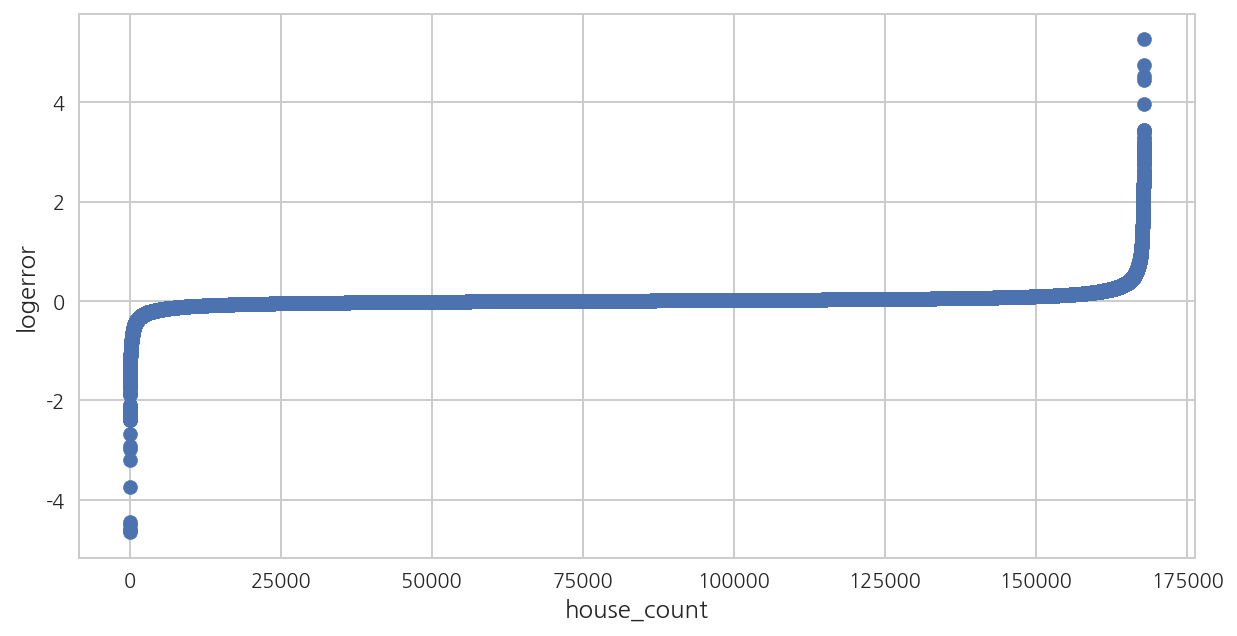

In [18]:
# logerror 값을 정렬하여 분포를 살펴봄
plt.figure(figsize=(10,5))
plt.scatter(range(merged.shape[0]), np.sort(merged["logerror"]))
plt.xlabel('house_count', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.show()

In [19]:
# 양 끝의 1%를 limit값으로 설정
ulimit = np.percentile(merged.logerror.values, 99)
llimit = np.percentile(merged.logerror.values, 1)
ulimit, llimit

(0.4959, -0.33113825441859)

##### Histogram (그리는 방법 다시 볼 것!! 앞에 두 줄이 뭔지 모르겟)

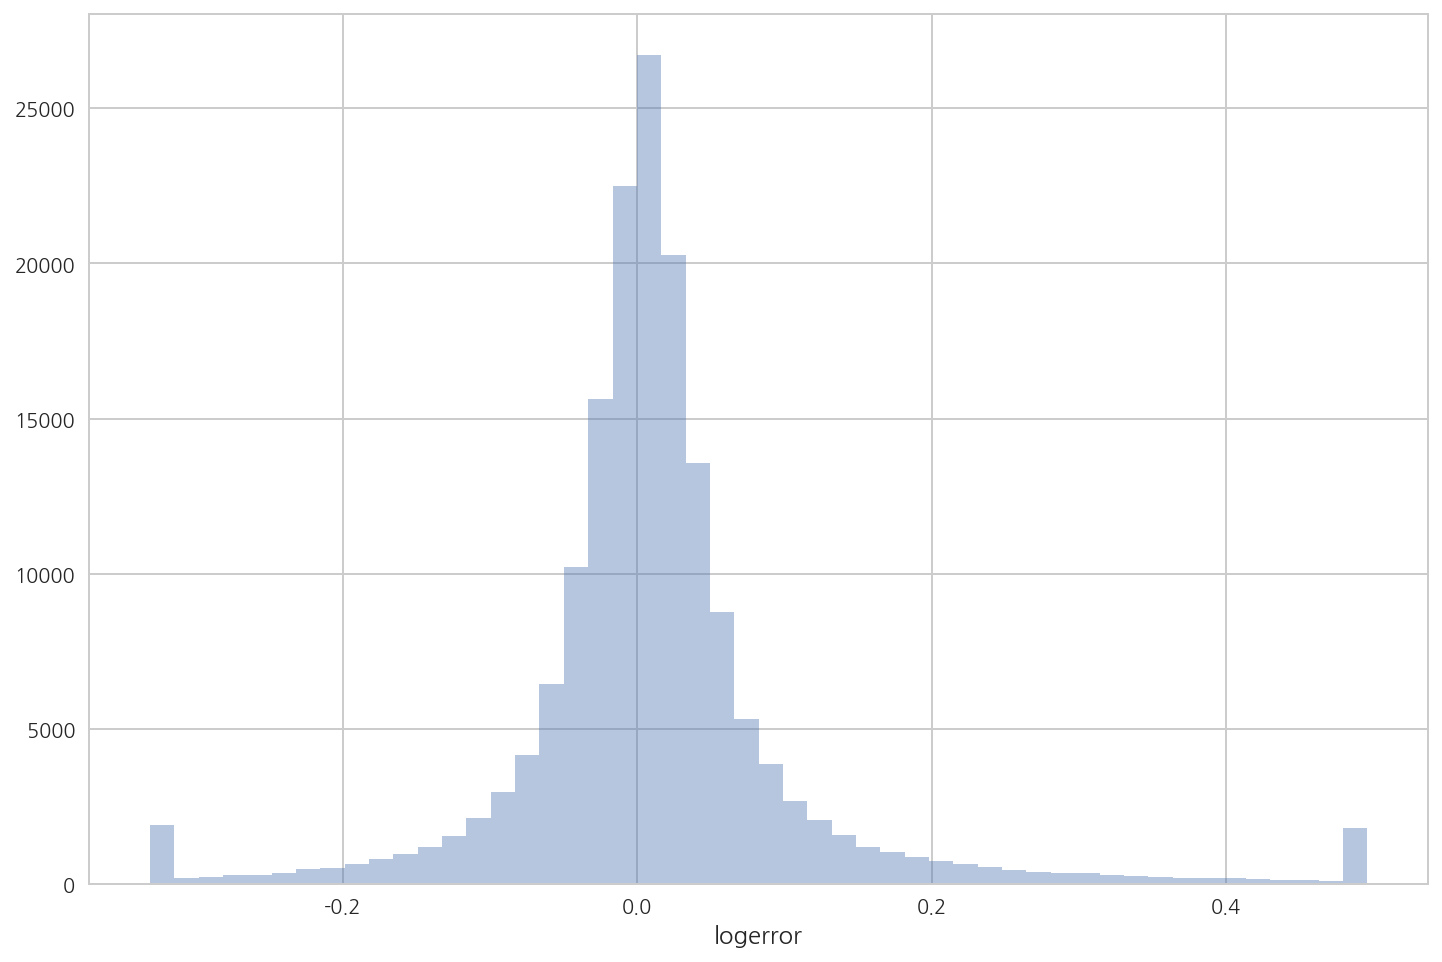

In [20]:
# log error histogram
merged['logerror'].loc[merged['logerror']>ulimit] = ulimit
merged['logerror'].loc[merged['logerror']<llimit] = llimit

plt.figure(figsize=(12,8))
sns.distplot(merged["logerror"], bins=50, kde=False)
plt.xlabel('logerror', fontsize=12)
plt.show()

##### **Comment:**
- logerror는 양 끝의 극단적인 값을 1% 절사하면 거의 정규분포 형태를 보임

#### 3) Missing value

##### 3-1) missing value ratio

In [21]:
merged_des["missing_ratio"] = 1-(merged_des["count"]/merged.shape[0])
merged_missing = pd.DataFrame(merged_des["missing_ratio"].sort_values(ascending=False))
merged_missing.reset_index()

,index,missing_ratio
0,buildingclasstypeid,0.999815
1,finishedsquarefeet13,0.999553
2,basementsqft,0.999446
3,storytypeid,0.999446
4,yardbuildingsqft26,0.999017
5,fireplaceflag,0.997653
6,architecturalstyletypeid,0.997212
7,typeconstructiontypeid,0.996891
8,finishedsquarefeet6,0.995193
9,decktypeid,0.992424


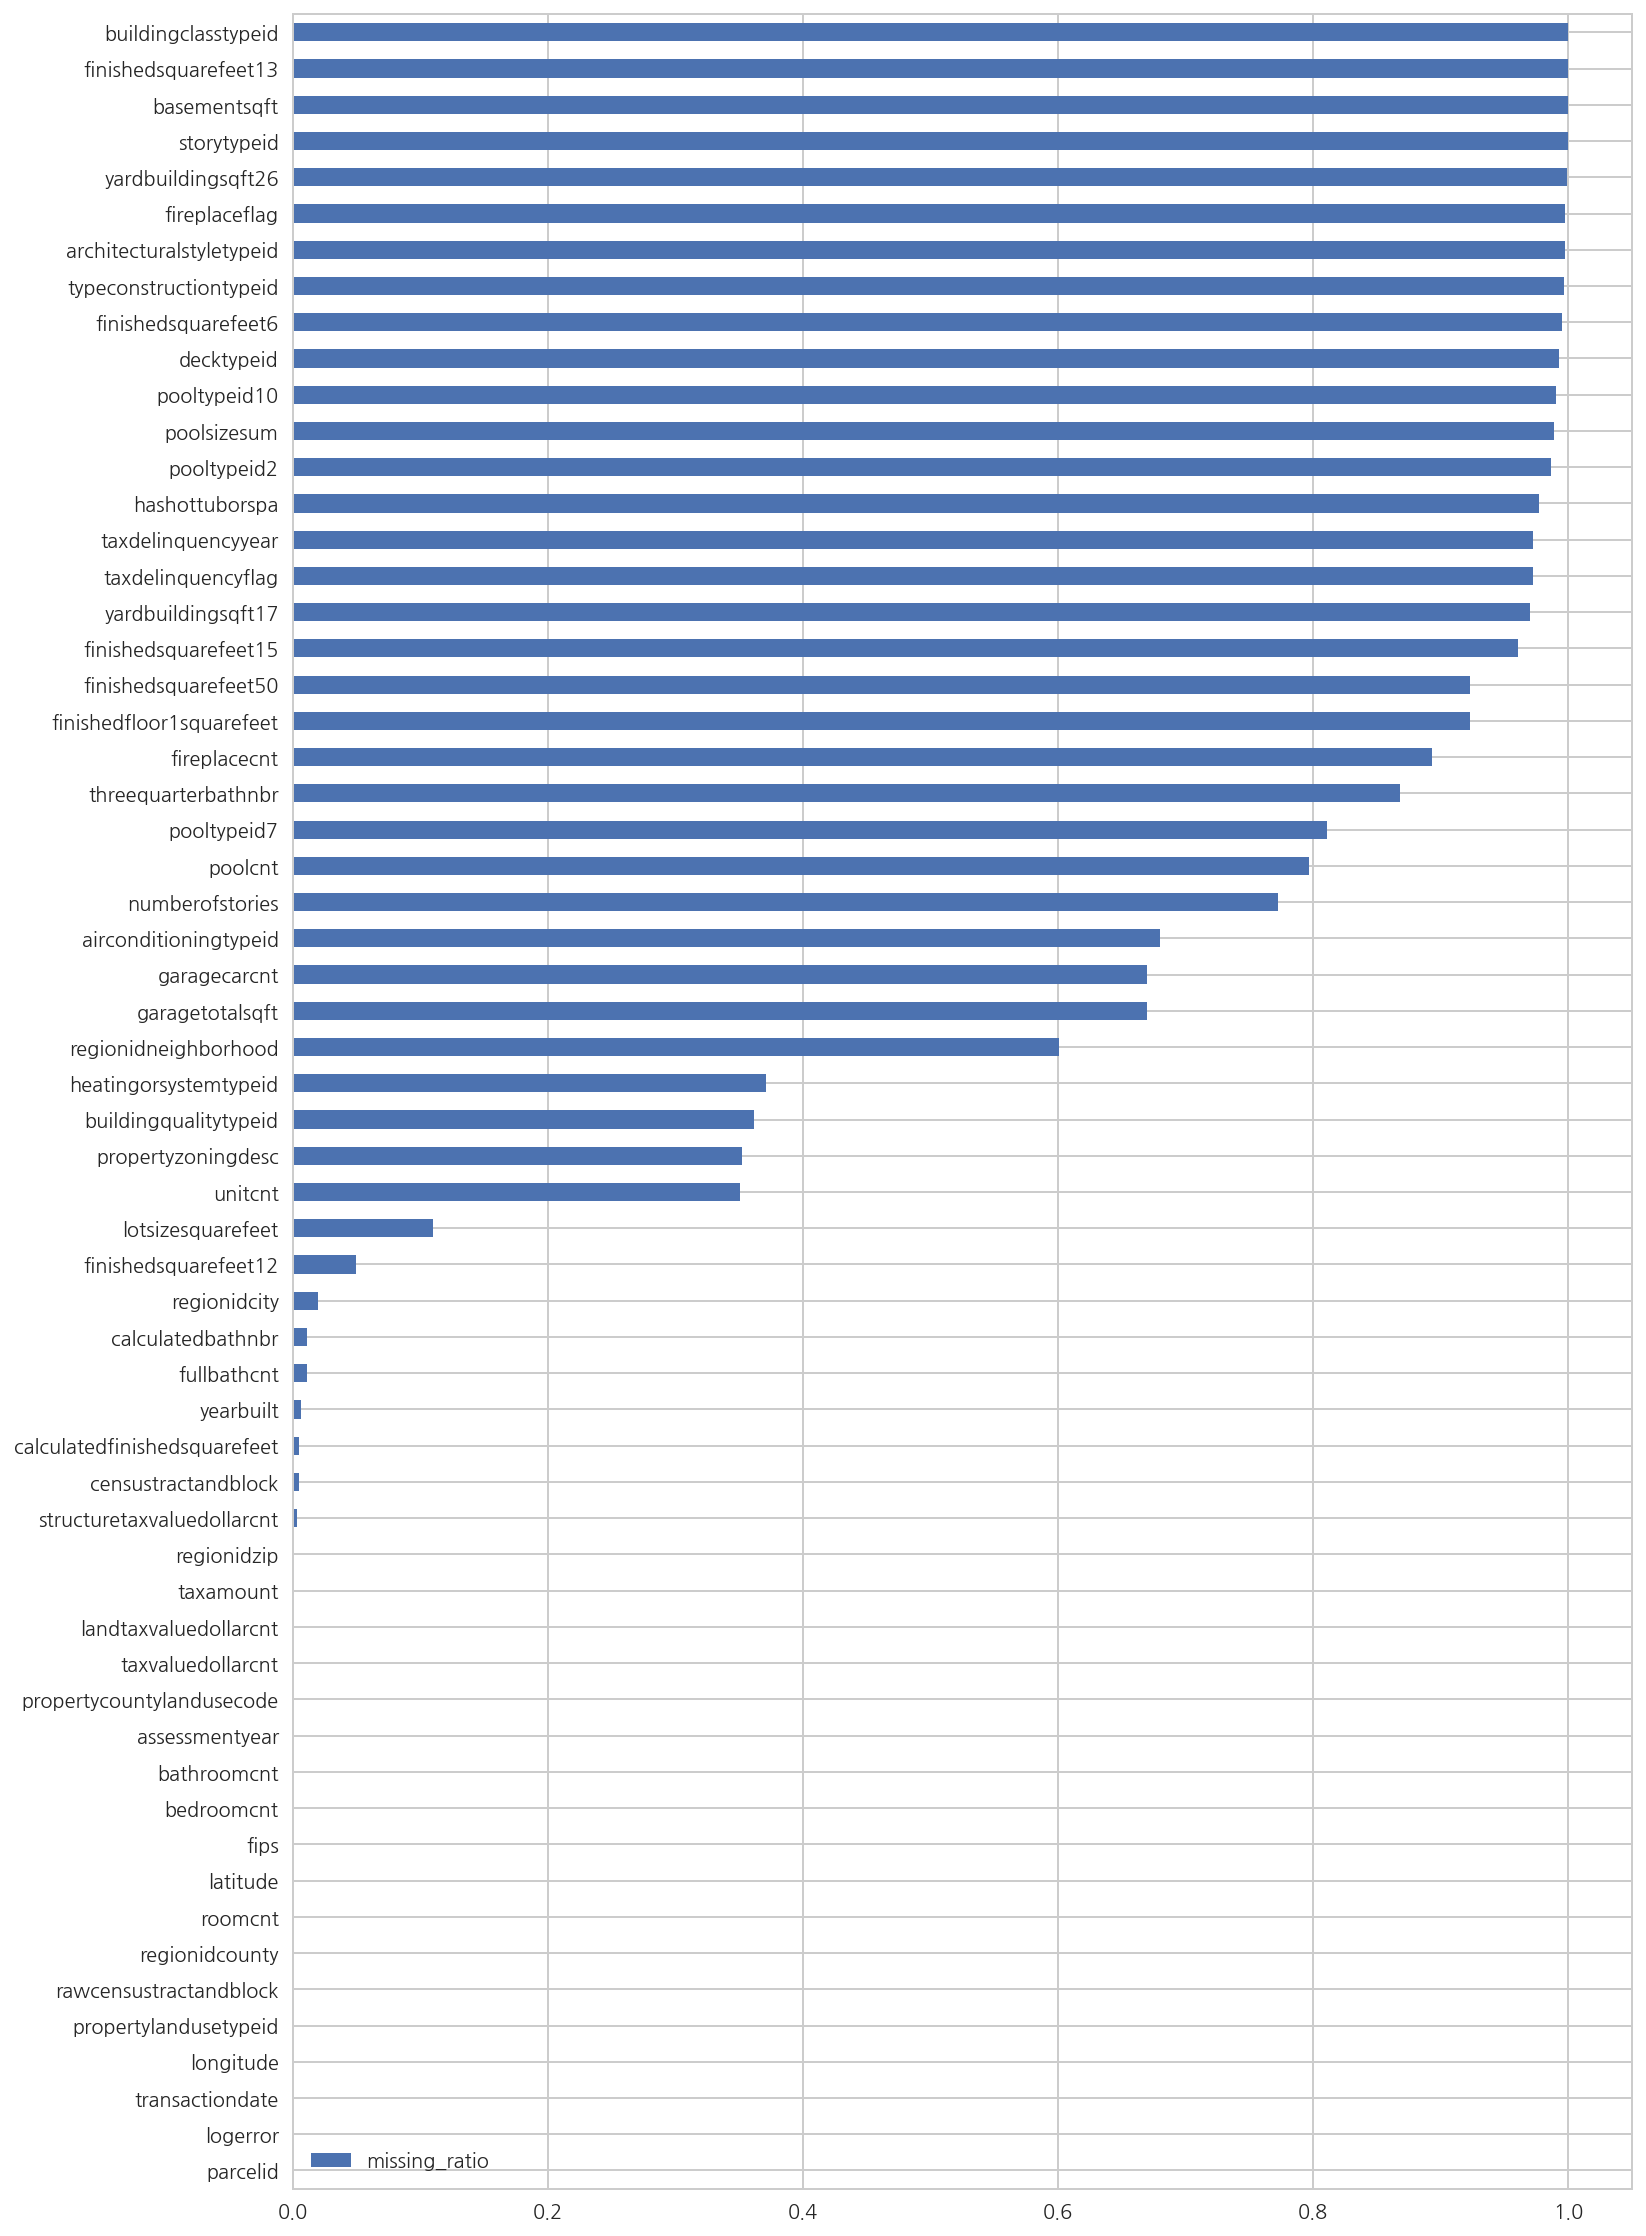

In [29]:
merged_missing.sort_values(by = "missing_ratio", ascending = True).plot(kind = 'barh', figsize=(12,20))

##### **Comment:**
- missing value 비중이 높은 변수가 많음
    - missing value ratio가 90% 이상인 변수가 17개, 60% 이상까지로 넓히면 26개 
- 그 밑으로는 missing 비중이 떨어져서 30%대인 변수가 3개, 그 밑으로는 또 10% 미만으로 떨어짐
- To do
    - missing value가 이 정도로 높은 변수들을 값을 채워 넣어도 괜찮은가?

#### **집의 지리, 위치, 주소와 관련된 변수들**
- 변수19 fips
- 변수26 latitude
- 변수27 longitude
- 변수36 rawcensustractandblock
- 변수60 censustractandblock
- 변수39 regionidcounty
- 변수38 regionidcity
- 변수41 regionidzip
- regionidneighborhood (missing value 높음)

##### 변수60. censustractandblock
- Census tract and block ID combined - also contains blockgroup assignment by extension

##### 변수36. rawcencustractandblock
- Census tract and block ID combined - also contains blockgroup assignment by extension

##### census track and block?
- https://www.census.gov/geo/maps-data/maps/block/2010/county/dc10blk_st06_county.html
- census를 위한 구역 (zip code와는 rarely correspond)
- 예시
    - LA:  county code 06 + county code 037 + tract code e.g. 4자리.2자리
    - Orange: 06001 + 4자리.2자리
- str으로 바꾸어서 다루어야 할 것 같음
- 이 코드를 가지고 위치로 바꾸는 방법 필요

In [ ]:
merged_des.loc["censustractandblock"].transpose()

In [ ]:
merged["censustractandblock"].astype("str").apply()

In [ ]:
merged["censustractandblock"].tail()

In [ ]:
merged_des.loc["rawcensustractandblock"].transpose()

In [ ]:
merged["censustractandblock"]

In [ ]:
merged["rawcensustractandblock"]

### **건물 타입 등에 대한 변수들**
- ~~architecturalstyletypeid~~
- ~~decktypeid~~
- ~~buildingqualitytypeid~~
- ~~buildingclasstypeid~~
- ~~storytypeid~~
- ~~typeconstructiontypeid~~
- propertycountylandusecode
- propertylandusetypeid
- propertyzoningdesc

#### **architecturalstyletypeid**
- 집의 건축 스타일에 대한 1부터 27까지 categorical data
- 27가지 class 중에 6가지만 나옴
- missing value ratio: 0.997212

In [22]:
merged_des.loc["architecturalstyletypeid"]

count                 468
unique                NaN
top                   NaN
freq                  NaN
first                 NaN
last                  NaN
mean              7.29915
std               2.71963
min                     2
25%                     7
50%                     7
75%                     7
max                    21
dtype             float64
missing_ratio    0.997212
Name: architecturalstyletypeid, dtype: object

In [23]:
architecturalstyletypeid = pd.DataFrame(merged["architecturalstyletypeid"])
architecturalstyletypeid.groupby("architecturalstyletypeid").size().reset_index(name='counts')

,architecturalstyletypeid,counts
0,2.0,16
1,3.0,7
2,7.0,394
3,8.0,35
4,10.0,1
5,21.0,15


#### **decktypeid**
- deck이 있다면 deck의 type
- but data dict에 type 분류가 없음, 66이 뭘 말하는지 알 수 없음
- missing value ratio: 0.992424

In [24]:
merged_des.loc["decktypeid"]

count                1272
unique                NaN
top                   NaN
freq                  NaN
first                 NaN
last                  NaN
mean                   66
std                     0
min                    66
25%                    66
50%                    66
75%                    66
max                    66
dtype             float64
missing_ratio    0.992424
Name: decktypeid, dtype: object

In [25]:
decktypeid = pd.DataFrame(merged["decktypeid"])
decktypeid.groupby("decktypeid").size().reset_index(name='counts')

,decktypeid,counts
0,66.0,1272


#### **buildingqualitytypeid**
- Overall assessment of condition of the building from best (lowest) to worst (highest)
- missing value ratio: 0.36164
    - 값을 대체하여 넣는다면 평균값으로? 

In [26]:
merged_des.loc["buildingqualitytypeid"]

count             107173
unique               NaN
top                  NaN
freq                 NaN
first                NaN
last                 NaN
mean             6.01546
std               1.8828
min                    1
25%                    4
50%                    7
75%                    7
max                   12
dtype            float64
missing_ratio    0.36164
Name: buildingqualitytypeid, dtype: object

In [30]:
buildingqualitytypeid = pd.DataFrame(merged["buildingqualitytypeid"])
buildingqualitytypeid_count = buildingqualitytypeid.groupby("buildingqualitytypeid").size().reset_index(name='counts')
buildingqualitytypeid_count

,buildingqualitytypeid,counts
0,1.0,2653
1,2.0,9
2,3.0,335
3,4.0,33347
4,5.0,2099
5,6.0,13503
6,7.0,35291
7,8.0,14690
8,9.0,2303
9,10.0,1774


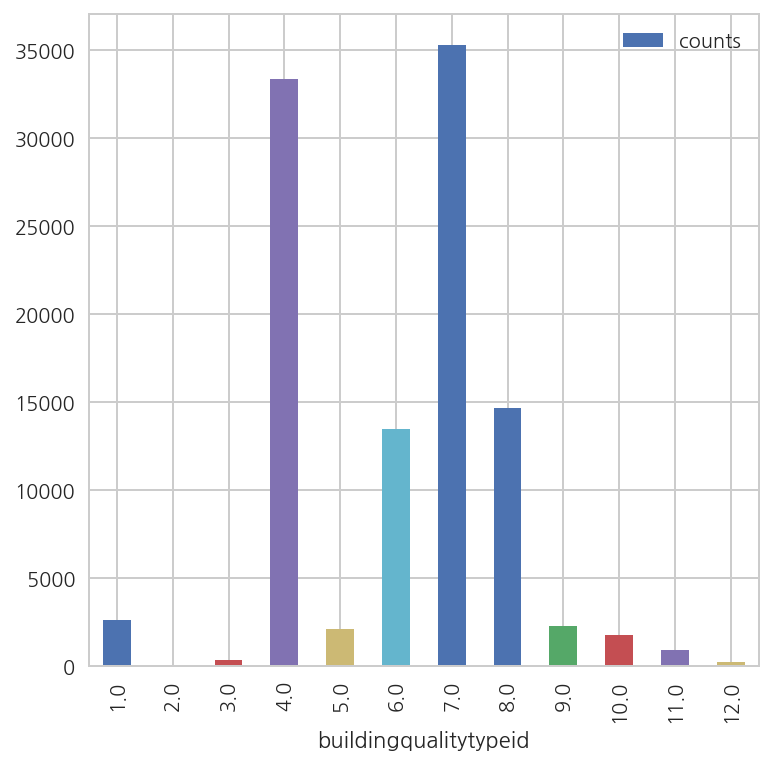

In [38]:
buildingqualitytypeid_count.plot(x = 'buildingqualitytypeid', y = 'counts', kind = 'bar', figsize=(6, 6))

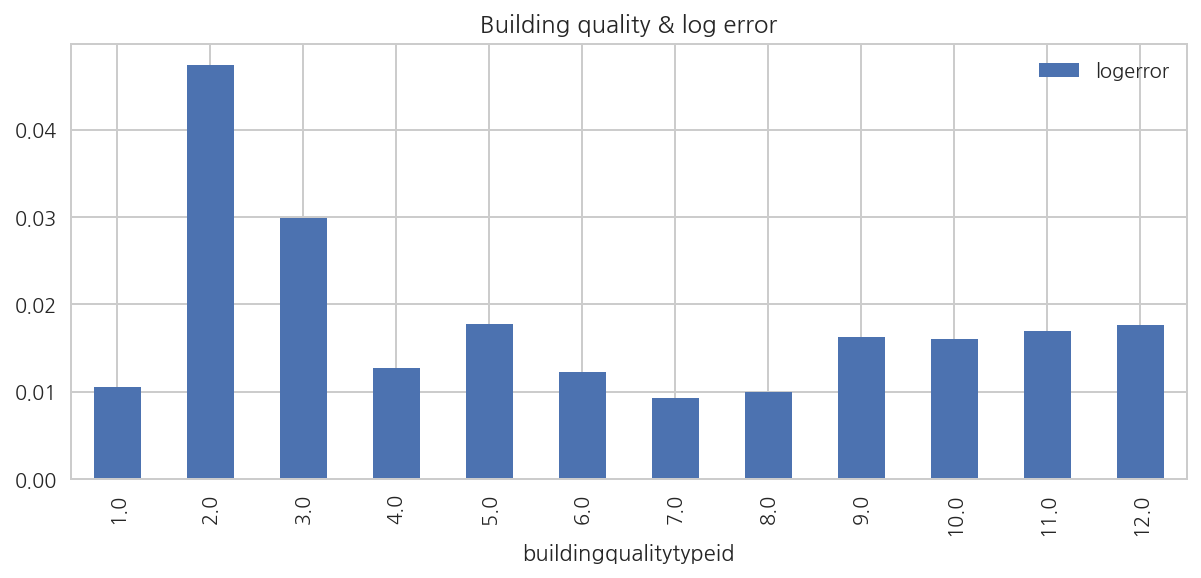

In [95]:
# buildingqualitytypeid와 logerror의 관계
buildingqualitytypeid_logerror = merged.loc[:,["buildingqualitytypeid","logerror"]].groupby("buildingqualitytypeid").agg('mean')
buildingqualitytypeid_logerror.plot(kind = 'bar', figsize=(10, 4), title = "Building quality & log error")

##### **Comment**
- quality 분포는 4(좋은 편), 7(중간)에 많이 모여있음
- 2, 3에서 logerror가 높게 나타남

#### **buildingclasstypeid**
- 건물이 fireproofed한 frame(non-combustible)를 갖고 있는지 분류 
    - 0-5 cateogories, 5=non of above → 진짜 missing value
    - 가장 많은 4는 그냥 wood, wood&steel frame
- missing value ratio: 0.999815 (too high)

In [39]:
buildingclasstypeid = pd.DataFrame(merged["buildingclasstypeid"])
buildingclasstypeid.groupby("buildingclasstypeid").size().reset_index(name='counts')

,buildingclasstypeid,counts
0,3.0,1
1,4.0,30


#### **storytypeid**
- Type of floors in a multi-story house (i.e. basement and main level, split-level, attic, etc.).  See tab for details.
- missing value ratio: 0.999446 (too high)

In [40]:
storytypeid_des = pd.read_excel('data/zillow_data_dictionary.xlsx', 'StoryTypeID')
storytypeid_des.tail()

,StoryTypeID,StoryDesc
30,31,Split Level
31,32,Tri-level with Attic & Basement
32,33,Tri-level with Attic
33,34,Tri-level with Basement
34,35,Tri-level


In [41]:
merged_des.loc["storytypeid"]

count                  93
unique                NaN
top                   NaN
freq                  NaN
first                 NaN
last                  NaN
mean                    7
std                     0
min                     7
25%                     7
50%                     7
75%                     7
max                     7
dtype             float64
missing_ratio    0.999446
Name: storytypeid, dtype: object

#### **typeconstructiontypeid**
- What type of construction material was used to construct the home
- missing value ratio: 0.996891 (too high)

In [51]:
# encoding check
typeconstructiontypeid_des = pd.read_excel('data/zillow_data_dictionary.xlsx', 'TypeConstructionTypeID')
typeconstructiontypeid_des

,TypeConstructionTypeID,TypeConstructionDesc
0,1,Adobe
1,2,Brick
2,3,Concrete Block
3,4,Concrete
4,5,Dome
5,6,Frame
6,7,Heavy
7,8,Log
8,9,Light
9,10,Metal


In [54]:
typeconstructiontypeid = pd.DataFrame(merged["typeconstructiontypeid"])
typeconstructiontypeid.groupby("typeconstructiontypeid").size().reset_index(name='counts')

,typeconstructiontypeid,counts
0,4.0,3
1,6.0,516
2,10.0,1
3,13.0,2


#### **propertycountylandusecode**
- County land use code i.e. it's zoning at the county level
- 90개 unique 값이 나옴

In [96]:
merged_des.loc["propertycountylandusecode"]

count                 167853
unique                    90
top                     0100
freq                   57628
first                    NaN
last                     NaN
mean                     NaN
std                      NaN
min                      NaN
25%                      NaN
50%                      NaN
75%                      NaN
max                      NaN
dtype                 object
missing_ratio    0.000208472
Name: propertycountylandusecode, dtype: object

In [98]:
propertycountylandusecode = pd.DataFrame(merged["propertycountylandusecode"])
propertycountylandusecode_count = propertycountylandusecode.groupby("propertycountylandusecode").size().reset_index(name='counts')

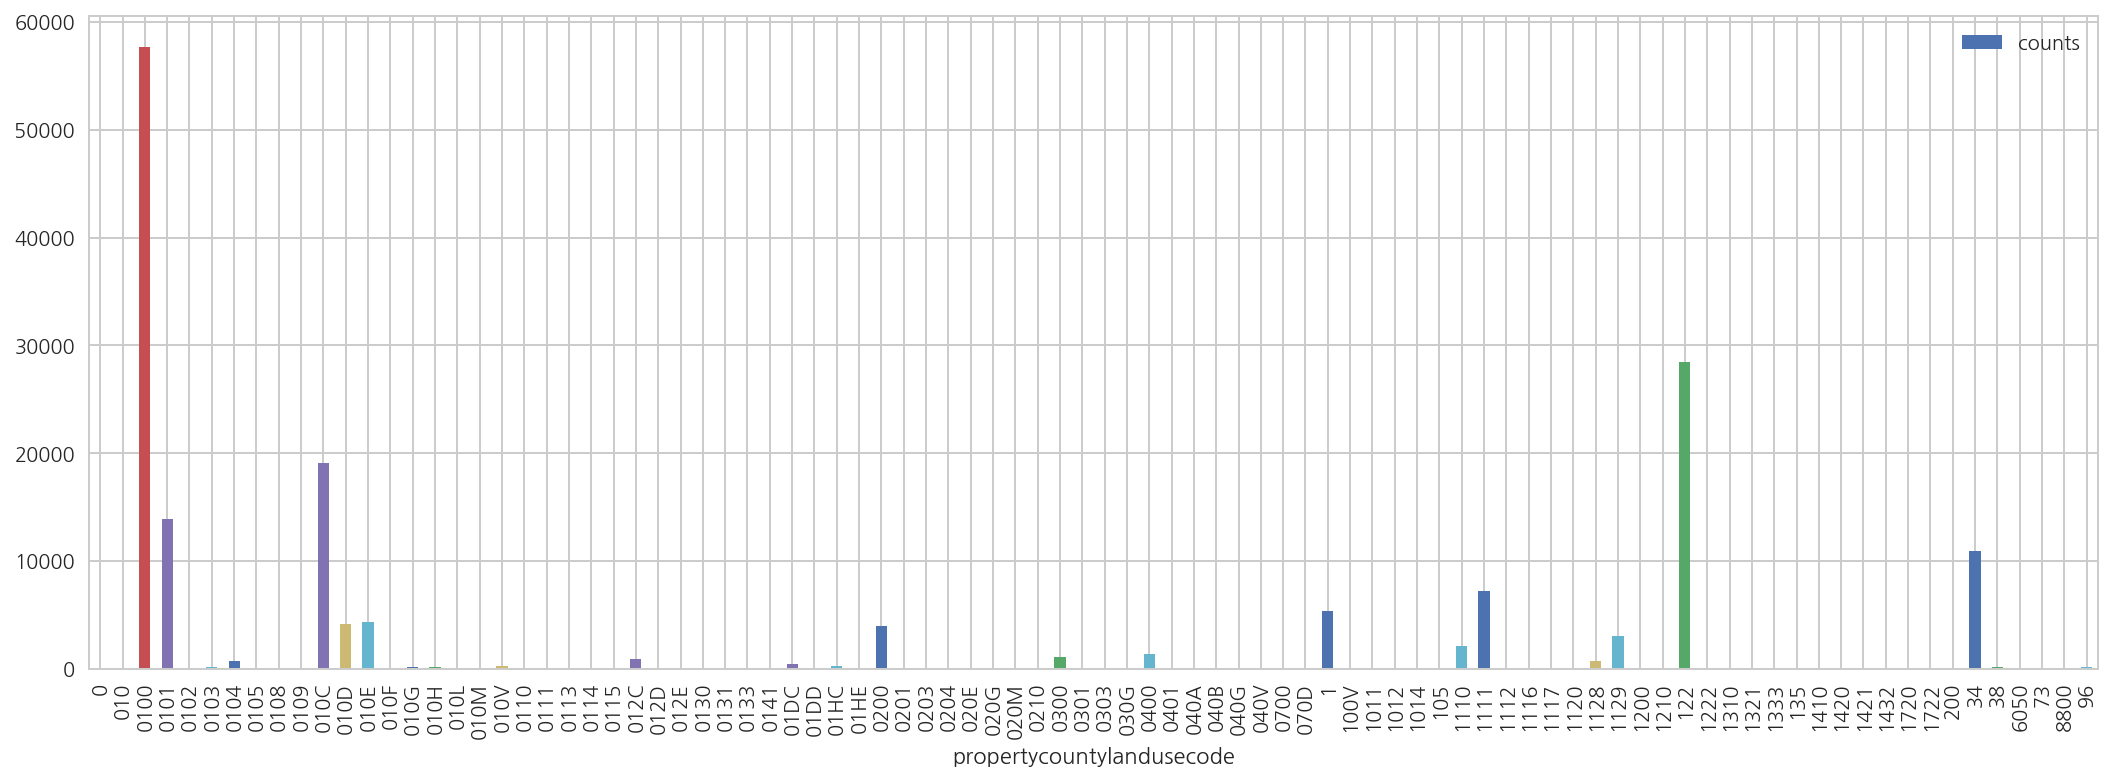

In [102]:
propertycountylandusecode_count.plot(x = 'propertycountylandusecode', y = 'counts', kind = 'bar', figsize=(18, 6))

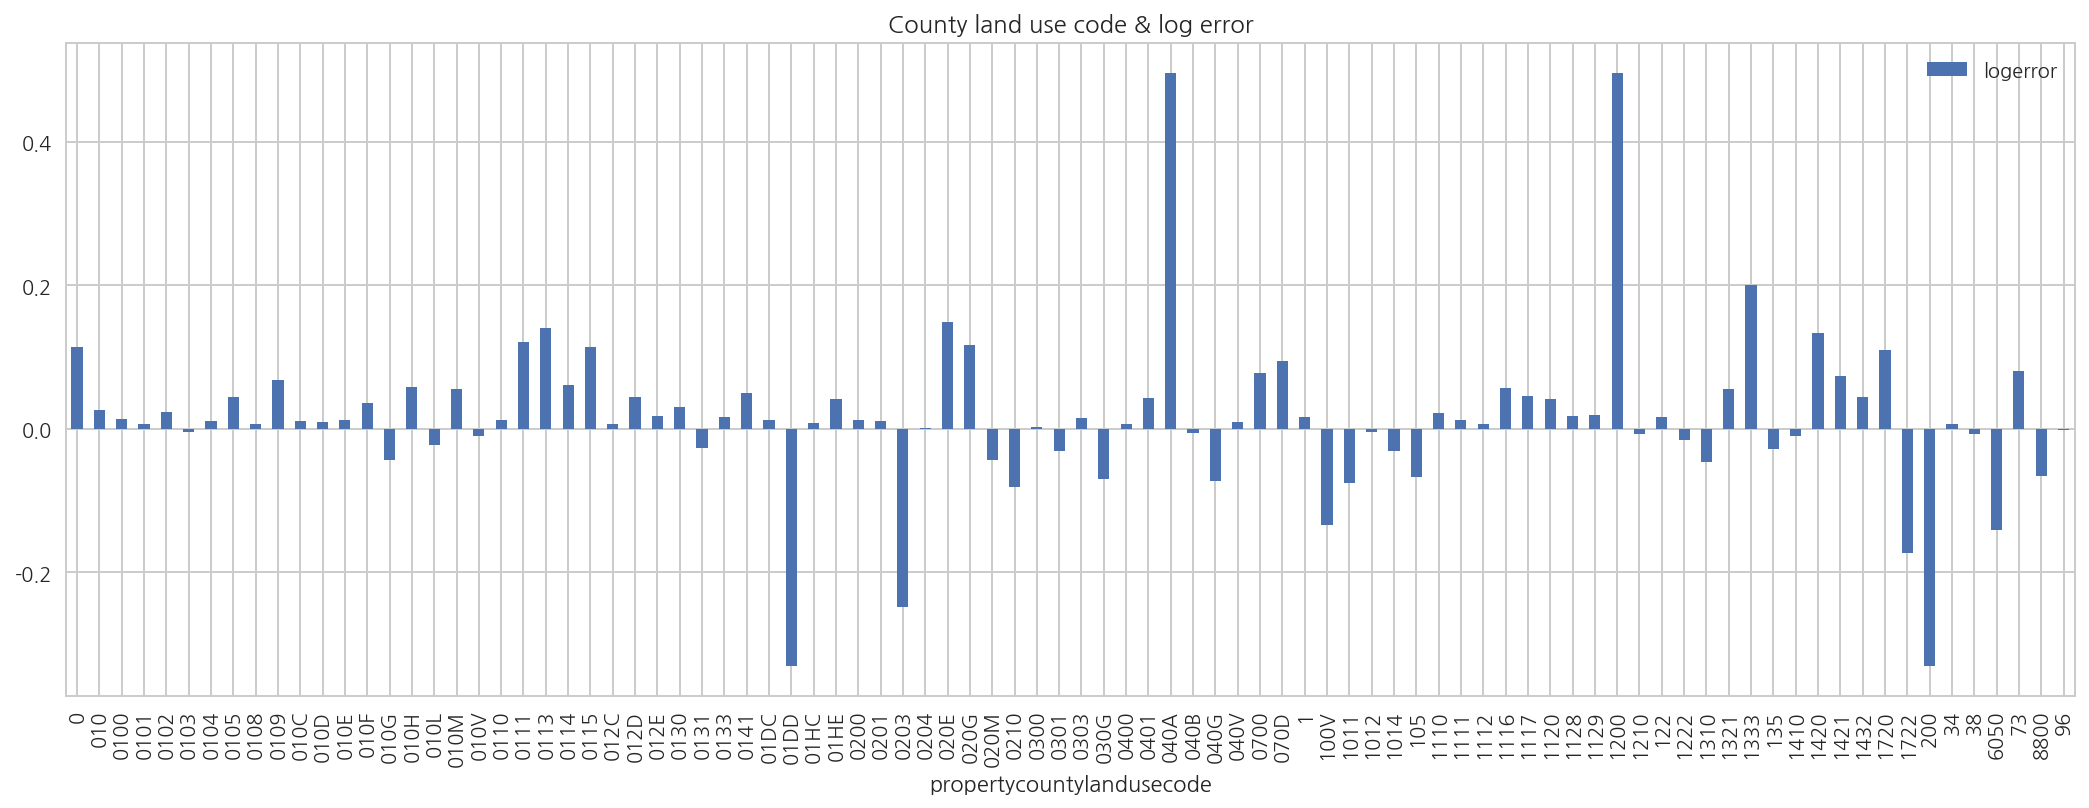

In [104]:
# propertycountylandusecode와 logerror의 관계
propertycountylandusecode_logerror = merged.loc[:,["propertycountylandusecode","logerror"]].groupby("propertycountylandusecode").agg('mean')
propertycountylandusecode_logerror.plot(kind = 'bar', figsize=(18, 6), title = "County land use code & log error")

##### **Comment:**
- 몇 개의 코드에 집중되어 분포되어 있음
- logerror의 평균은 코드에 따라 꽤 차이를 보이는 것 같은데, 분포가 많은 코드는 logerror값이 작음 ('0100', '010C', '122')

#### **propertylandusetypeid**
- Type of land use the property is zoned for

In [56]:
# encoding check
propertylandusetypeid_des = pd.read_excel('data/zillow_data_dictionary.xlsx', 'PropertyLandUseTypeID')
propertylandusetypeid_des

,PropertyLandUseTypeID,PropertyLandUseDesc
0,31,Commercial/Office/Residential Mixed Used
1,46,Multi-Story Store
2,47,Store/Office (Mixed Use)
3,246,"Duplex (2 Units, Any Combination)"
4,247,"Triplex (3 Units, Any Combination)"
5,248,"Quadruplex (4 Units, Any Combination)"
6,260,Residential General
7,261,Single Family Residential
8,262,Rural Residence
9,263,Mobile Home


In [84]:
propertylandusetypeid = pd.DataFrame(merged["propertylandusetypeid"])
propertylandusetypeid.groupby("propertylandusetypeid").size().reset_index(name='counts')

,propertylandusetypeid,counts
0,31.0,32
1,47.0,1
2,246.0,4397
3,247.0,1168
4,248.0,1608
5,260.0,104
6,261.0,113078
7,263.0,158
8,264.0,17
9,265.0,691


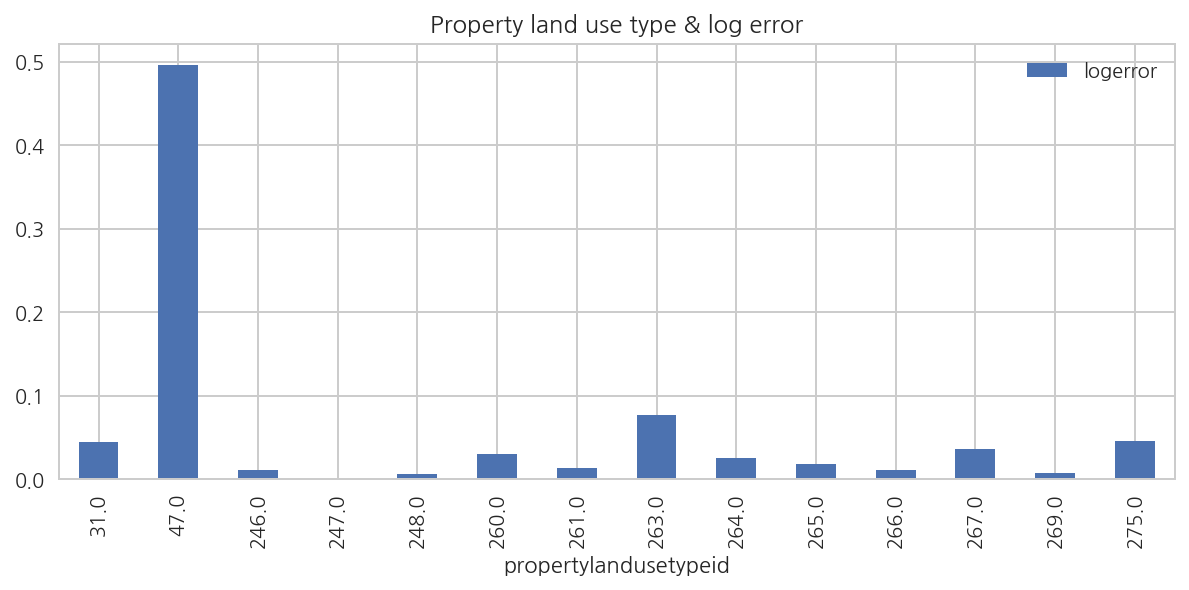

In [86]:
# propertylandusetypeid와 logerror의 관계
propertylandusetypeid_logerror = merged.loc[:,["propertylandusetypeid","logerror"]].groupby("propertylandusetypeid").agg('mean')
propertylandusetypeid_logerror.plot(kind = 'bar', figsize=(10, 4), title = "Property land use type & log error")

##### **Comment:**
- 261	Single Family Residential과 266	Condominium이 데이터의 대부분을 차지함
- 47 Store/Office (Mixed Use)의 경우 logerror가 다른 type에 비해 매우 높게 나타남

#### **propertyzoningdesc**
- Description of the allowed land uses (zoning) for that property
- 알파벳과 숫자로 이루어진 코드
- 2347개 unique값이 있는데 이 코드를 어떻게 처리할지 모르겠음 ㅜ (검색해도 규칙을 못 찾고 있음)
- 정확히 뭐가 무슨 의미다는 찾기 어렵지만 앞에 2-3글자 정도로 grouping을 해볼 수 있을 것 같음
- missing value ratio: 0.352014

In [91]:
len(merged["propertyzoningdesc"].unique())

2347

In [105]:
pd.DataFrame(merged["propertyzoningdesc"].unique()).head()

,0
0,LARS
1,NaN
2,PSR6
3,LAR3
4,HBR3YY


In [111]:
propertyzoningdesc = pd.DataFrame(merged["propertyzoningdesc"])
propertyzoningdesc.groupby("propertyzoningdesc").size().reset_index(name='counts').tail()

,propertyzoningdesc,counts
2341,WVRPD40000,2
2342,WVRPD4OOOO,28
2343,WVRPD56*,6
2344,WVRR,4
2345,WVRR1-RPD1,13


##### 앞에 세 글자만 잘라서 새로운 컬럼 만들기

In [110]:
merged["propertyzoningdesc_3"] = merged["propertyzoningdesc"].astype("str").apply(lambda x: x[:3])

In [117]:
propertyzoningdesc_3 = pd.DataFrame(merged["propertyzoningdesc_3"])
propertyzoningdesc_3.groupby("propertyzoningdesc_3").size().reset_index(name='counts').tail()

,propertyzoningdesc_3,counts
355,WNR,1
356,WV,2
357,WVA,10
358,WVR,263
359,nan,59099


##### 앞에 두 글자만 잘라서 새로운 컬럼 만들기

In [118]:
merged["propertyzoningdesc_2"] = merged["propertyzoningdesc"].astype("str").apply(lambda x: x[:2])
propertyzoningdesc_2 = pd.DataFrame(merged["propertyzoningdesc_2"])
propertyzoningdesc_2.groupby("propertyzoningdesc_2").size().reset_index(name='counts').tail()

,propertyzoningdesc_2,counts
97,WD,691
98,WH,1049
99,WN,1
100,WV,275
101,na,59099


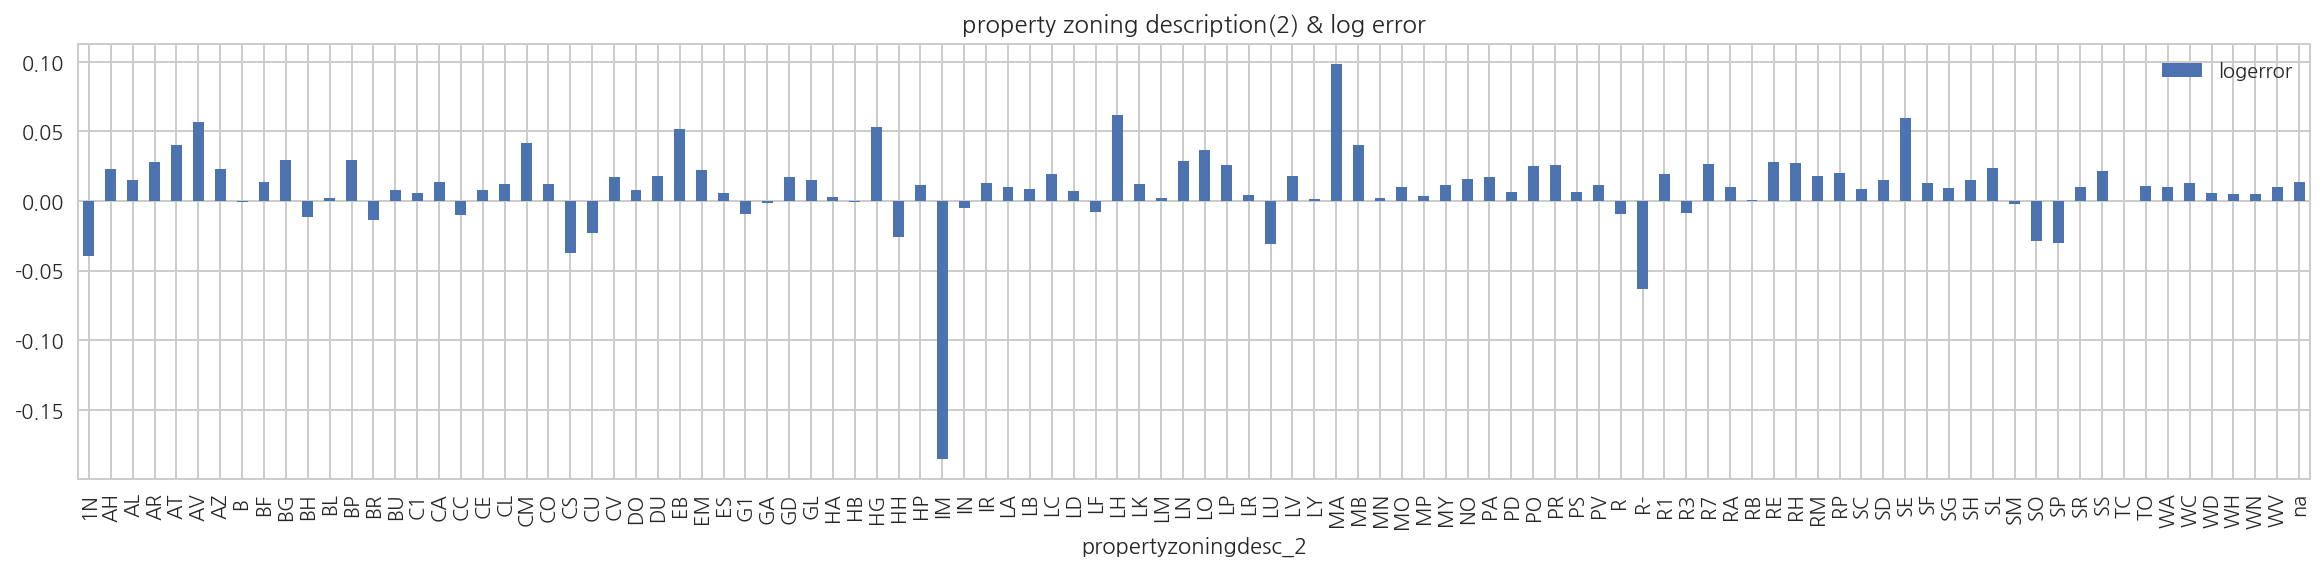

In [121]:
# propertyzoningdesc_2와 logerror의 관계
propertyzoningdesc_2_logerror = merged.loc[:,["propertyzoningdesc_2","logerror"]].groupby("propertyzoningdesc_2").agg('mean')
propertyzoningdesc_2_logerror.plot(kind = 'bar', figsize=(20, 4), title = "property zoning description(2) & log error")

##### **Comment:**
- 앞의 두 글자로 묶으면 na(NaN값) 포함 102개 class로 묶임
- 이 때 클래스별로 log error는 좀 다르게 나타나는 걸로 보임 (e.g. 'IM'의 경우 logerror가 굉장히 낮게 나옴)

##### 변수 (6) basementsqft
- Finished living area below or partially below ground level
- 지하가 없어서 NaN 값일까? - 그렇다면 0으로 채울 수도 있는 것?

In [42]:
merged_des.loc["basementsqft"].transpose()

count                  93
unique                NaN
top                   NaN
freq                  NaN
first                 NaN
last                  NaN
mean              695.376
std               583.952
min                    38
25%                   280
50%                   588
75%                   819
max                  3560
dtype             float64
missing_ratio    0.999446
Name: basementsqft, dtype: object

##### 변수 (13) finishedfloor1squarefeet
- Size of the finished living area on the first (entry) floor of the home
- finishedsquarefeet 변수끼리는 관련이 있을 수 도 있을 것 (빠져야되는 변수일 가능성이 높을 듯)

In [60]:
merged_des.loc["finishedfloor1squarefeet"].transpose()

count              12893
unique               NaN
top                  NaN
freq                 NaN
first                NaN
last                 NaN
mean             1356.49
std              661.069
min                   44
25%                  945
50%                 1252
75%                 1615
max                 7625
dtype            float64
missing_rate    0.923205
Name: finishedfloor1squarefeet, dtype: object

##### 변수 (16) finishedsquarefeet13
- Perimeter living area : perimeter living area가 뭔지 대체 모르겠음
- finishedsquarefeet 변수끼리는 관련이 있을 수도 있을 것 (빠져야되는 변수일 가능성이 높을 듯)

In [61]:
merged_des.loc["finishedsquarefeet13"].transpose()

count                 75
unique               NaN
top                  NaN
freq                 NaN
first                NaN
last                 NaN
mean             1395.71
std              116.539
min                 1056
25%                 1344
50%                 1440
75%                 1440
max                 1584
dtype            float64
missing_rate    0.999553
Name: finishedsquarefeet13, dtype: object

##### 변수 (18) finishedsquarefeet50
- Size of the finished living area on the first (entry) floor of the home
    - 변수 (13) finishedfloor1squarefeet와 설명이 동일!! 데이터 분포도 거의 비슷!!
- finishedsquarefeet 변수끼리는 관련이 있을 수 도 있을 것 (빠져야되는 변수일 가능성이 높을 듯)

In [62]:
merged_des.loc["finishedsquarefeet50"].transpose()

count              12893
unique               NaN
top                  NaN
freq                 NaN
first                NaN
last                 NaN
mean             1367.65
std              698.669
min                   44
25%                  945
50%                 1252
75%                 1619
max                12467
dtype            float64
missing_rate    0.923205
Name: finishedsquarefeet50, dtype: object

##### 변수 (19) finishedsquarefeet6
- Base unfinished and finished area
- 변수 (6) basementsqft와의 관련성?

In [63]:
merged_des.loc["finishedsquarefeet6"].transpose()

count                807
unique               NaN
top                  NaN
freq                 NaN
first                NaN
last                 NaN
mean             2197.29
std              1300.55
min                  257
25%                 1057
50%                 1886
75%                 3240
max                 7224
dtype            float64
missing_rate    0.995193
Name: finishedsquarefeet6, dtype: object

##### 18개 중에 가능성
- basementsqft
- poolcnt는 한번 볼만 할듯
- yardsquaresqft

In [64]:
merged_des.loc["numberofstories"].transpose()

count              38169
unique               NaN
top                  NaN
freq                 NaN
first                NaN
last                 NaN
mean             1.43776
std             0.544508
min                    1
25%                    1
50%                    1
75%                    2
max                    6
dtype            float64
missing_rate    0.772652
Name: numberofstories, dtype: object

In [86]:
numberofstories = pd.DataFrame(merged["numberofstories"])
numberofstories.groupby("numberofstories").size().reset_index(name='counts')

,numberofstories,counts
0,1.0,22413
1,2.0,14808
2,3.0,945
3,4.0,2
4,6.0,1


In [185]:
# numberofstories는 1로 sub 할 가능성이 있다?

In [65]:
merged_des.loc["airconditioningtypeid"].transpose()

count             53788
unique              NaN
top                 NaN
freq                NaN
first               NaN
last                NaN
mean            1.81435
std             2.97024
min                   1
25%                   1
50%                   1
75%                   1
max                  13
dtype           float64
missing_rate    0.67962
Name: airconditioningtypeid, dtype: object

In [85]:
airconditioningtypeid = pd.DataFrame(merged["airconditioningtypeid"])
airconditioningtypeid.groupby("airconditioningtypeid").size().reset_index(name='counts')

,airconditioningtypeid,counts
0,1.0,49854
1,3.0,1
2,5.0,382
3,9.0,27
4,11.0,116
5,13.0,3408


In [68]:
merged_des.loc["garagecarcnt"].transpose()

count              55457
unique               NaN
top                  NaN
freq                 NaN
first                NaN
last                 NaN
mean             1.81351
std             0.599447
min                    0
25%                    2
50%                    2
75%                    2
max                   24
dtype            float64
missing_rate    0.669679
Name: garagecarcnt, dtype: object

In [84]:
garagecarcnt = pd.DataFrame(merged["garagecarcnt"])
garagecarcnt.groupby("garagecarcnt").size().reset_index(name='counts')

,garagecarcnt,counts
0,0.0,520
1,1.0,12370
2,2.0,40580
3,3.0,1295
4,4.0,518
5,5.0,99
6,6.0,30
7,7.0,15
8,8.0,9
9,9.0,8


In [72]:
merged_des.loc["heatingorsystemtypeid"].transpose()

count             105651
unique               NaN
top                  NaN
freq                 NaN
first                NaN
last                 NaN
mean             3.92453
std               3.6426
min                    1
25%                    2
50%                    2
75%                    7
max                   24
dtype            float64
missing_rate    0.370705
Name: heatingorsystemtypeid, dtype: object

In [83]:
heatingorsystemtypeid = pd.DataFrame(merged["heatingorsystemtypeid"])
heatingorsystemtypeid.groupby("heatingorsystemtypeid").size().reset_index(name='counts')

,heatingorsystemtypeid,counts
0,1.0,26
1,2.0,71936
2,6.0,1747
3,7.0,29626
4,10.0,5
5,11.0,2
6,12.0,1
7,13.0,136
8,14.0,2
9,18.0,48


In [75]:
merged_des.loc["unitcnt"].transpose()

count             109056
unique               NaN
top                  NaN
freq                 NaN
first                NaN
last                 NaN
mean             1.11037
std             0.988168
min                    1
25%                    1
50%                    1
75%                    1
max                  237
dtype            float64
missing_rate    0.350424
Name: unitcnt, dtype: object

In [81]:
unitcnt = pd.DataFrame(merged["unitcnt"])
unitcnt.groupby("unitcnt").size().reset_index(name='counts')

,unitcnt,counts
0,1.0,101916
1,2.0,4385
2,3.0,1148
3,4.0,1597
4,5.0,1
5,6.0,2
6,9.0,1
7,11.0,1
8,42.0,1
9,45.0,1


### missing value가 적은 변수들

In [92]:
merged_missing[merged_missing["missing_rate"] <= 0.2]

,missing_rate
lotsizesquarefeet,0.109847
finishedsquarefeet12,0.0498487
regionidcity,0.0197096
calculatedbathnbr,0.010912
fullbathcnt,0.010912
yearbuilt,0.00631373
calculatedfinishedsquarefeet,0.00533689
censustractandblock,0.00527733
structuretaxvaluedollarcnt,0.00315091
regionidzip,0.000708806


###### 변수6 bathroomcnt
###### 변수7 bedroomcnt
###### 변수10 calculatedbathnbr
###### 변수13 calculatedfinishedsquarefeet
###### 변수14 finishedsqurefeet12

###### 변수21 fullbathcnt
###### 변수28 lotsizesquarefeet


###### 변수42 roomcnt
###### 변수49 yearbuilt
###### 변수52 structuretaxvaluedollarcnt
###### 변수53 taxvaluedollarcnt
###### 변수54 assessmentyear
###### 변수55 landtaxvaluedollarcnt
###### 변수56 taxamount


In [ ]:
merged_des.loc["yearbuilt"].transpose()

In [ ]:
yearbuilt = pd.DataFrame(merged["yearbuilt"])
yearbuilt_dist = yearbuilt.groupby("yearbuilt").size().reset_index(name='counts')
yearbuilt_dist["yearbuilt"] = yearbuilt_dist["yearbuilt"].astype("int64")
yearbuilt_dist

In [ ]:
plt.bar(yearbuilt_dist["yearbuilt"], yearbuilt_dist["count"])
plt.show()

In [ ]:
data_dict.tail()